# Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [60]:
train0 = pd.read_csv('/Users/merlesteffen/Documents/GitHub/MushroomClassification/Data/train.csv')
test0 = pd.read_csv('/Users/merlesteffen/Documents/GitHub/MushroomClassification/Data/test.csv')

In [61]:
train0

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0
...,...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,7002,1
6495,k,e,False,p,p,v,7323,1
6496,f,g,False,n,b,y,6206,1
6497,f,n,True,w,w,s,4658,0


In [62]:
train_id = train0.pop('Id')
test_id = test0.pop('Id')
target = train0.pop('poisonous')

In [63]:
train0.dtypes

cap.shape                 object
cap.color                 object
bruises                     bool
stalk.color.above.ring    object
stalk.color.below.ring    object
population                object
dtype: object

## Missing Values

No missing values found

In [64]:
train0

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population
0,k,e,False,w,w,v
1,f,e,True,p,w,y
2,b,w,False,w,w,s
3,k,g,False,w,w,n
4,f,n,True,p,g,v
...,...,...,...,...,...,...
6494,f,g,False,b,b,v
6495,k,e,False,p,p,v
6496,f,g,False,n,b,y
6497,f,n,True,w,w,s


# Encode

In [65]:
mappings = list()

encoder = LabelEncoder()

for column in range(len(train0.columns)):
    train0[train0.columns[column]] = encoder.fit_transform(train0[train0.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

# Split Data

In [66]:
X = train0.copy()
y = target.copy()


In [67]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [68]:
X

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population
0,-0.222731,-0.978198,-0.85242,0.624795,0.637699,0.279074
1,-0.848014,-0.978198,1.17313,0.098067,0.637699,1.078765
2,-2.098581,1.382189,-0.85242,0.624795,0.637699,-0.520618
3,-0.222731,-0.584800,-0.85242,0.624795,0.637699,-1.320309
4,-0.848014,-0.191402,1.17313,0.098067,-1.445963,0.279074
...,...,...,...,...,...,...
6494,-0.848014,-0.584800,-0.85242,-3.062298,-3.008710,0.279074
6495,-0.222731,-0.978198,-0.85242,0.098067,0.116783,0.279074
6496,-0.848014,-0.584800,-0.85242,-0.955388,-3.008710,1.078765
6497,-0.848014,-0.191402,1.17313,0.624795,0.637699,-0.520618


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Model Selection

In [70]:
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

# Train

In [71]:
np.sum(y) / len(y)

0.4857670410832436

In [72]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [73]:
from sklearn.metrics import confusion_matrix

def false_negatives(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn

# Logistic Regression
y_pred_log = log_model.predict(X_test)
fn_log = false_negatives(y_test, y_pred_log)
print(f"---Logistic Regression FN: {fn_log}")

# Support Vector Machine
y_pred_svm = svm_model.predict(X_test)
fn_svm = false_negatives(y_test, y_pred_svm)
print(f"Support Vector Machine FN: {fn_svm}")

# Neural Network
y_pred_nn = nn_model.predict(X_test)
fn_nn = false_negatives(y_test, y_pred_nn)
print(f"--------Neural Network FN: {fn_nn}")

---Logistic Regression FN: 111
Support Vector Machine FN: 35
--------Neural Network FN: 16


In [74]:
from sklearn.metrics import confusion_matrix

# Logistic Regression
y_pred_log = log_model.predict(X_test)
cm_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix for Logistic Regression:\n", cm_log)

# Support Vector Machine
y_pred_svm = svm_model.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for SVM:\n", cm_svm)

# Neural Network
y_pred_nn = nn_model.predict(X_test)
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion Matrix for Neural Network:\n", cm_nn)

Confusion Matrix for Logistic Regression:
 [[533 117]
 [111 539]]

Confusion Matrix for SVM:
 [[577  73]
 [ 35 615]]

Confusion Matrix for Neural Network:
 [[609  41]
 [ 16 634]]


In [75]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# For Logistic Regression
y_prob_log = log_model.predict_proba(X_test)[:,1] # probabilities of the positive class

# ROC
fpr_log, tpr_log, thresholds_roc = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# PR Curve
precision_log, recall_log, thresholds_pr = precision_recall_curve(y_test, y_prob_log)

# You can then plot these metrics against each other to visualize the curves.

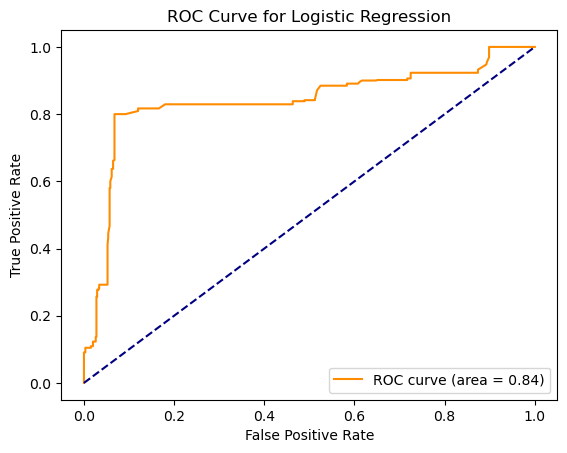

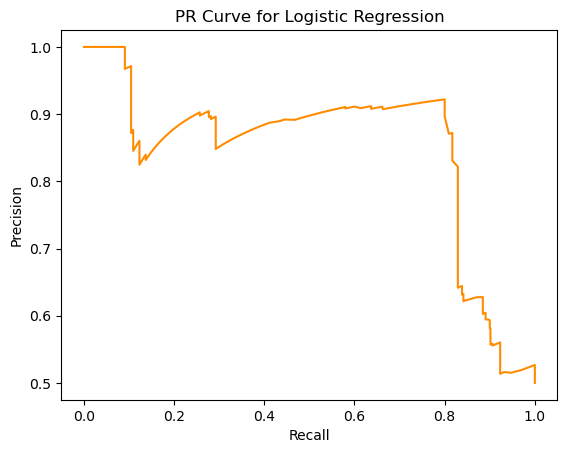

In [76]:
import matplotlib.pyplot as plt

# For Logistic Regression ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', label=f'ROC curve (area = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# For Logistic Regression PR Curve
precision_log, recall_log, _ = precision_recall_curve(y_test, y_prob_log)

plt.figure()
plt.plot(recall_log, precision_log, color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve for Logistic Regression')
plt.show()

In [77]:
print(f"---Logistic Regression: {log_model.score(X_test, y_test)}")
print(f"Support Vector Machine: {svm_model.score(X_test, y_test)}")
print(f"--------Neural Network: {nn_model.score(X_test, y_test)}")

---Logistic Regression: 0.8246153846153846
Support Vector Machine: 0.916923076923077
--------Neural Network: 0.9561538461538461


# Visualisation

<Axes: >

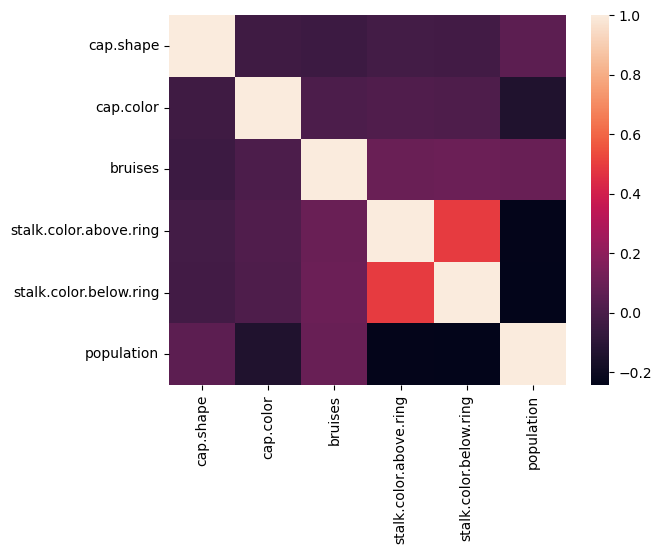

In [78]:
corr = train0.corr()

sns.heatmap(corr)

# Submit

In [ ]:
nn_model.fit(X,y)

In [ ]:
test0

In [ ]:
test_id

In [ ]:
train0

In [ ]:
test0

In [57]:
y_predict = nn_model.predict(test0)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:
submission_file = pd.DataFrame({
    'Id':test_id,
    'poisonous': y_predict
})

In [ ]:
submission_file.head

In [56]:
target

0       1
1       0
2       0
3       0
4       0
       ..
6494    1
6495    1
6496    1
6497    0
6498    1
Name: poisonous, Length: 6499, dtype: int64